# Problem Statement

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.


## Data Preprocessing:

### 1.  Importing Required Libraries

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
from functools import reduce
from operator import add
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset and reading the data
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape

(18207, 60)

### 2. Drop irrelevant columns 

Columns which are irrelevant for analysis are:
    1. Photo
    2. Flag
    3. Club Logo
    4. Jersey Number

In [4]:
df1 = df.drop(labels=['Photo','Flag','Club Logo','Jersey Number'],axis = 1)

In [5]:
df1.shape # After Dropping the irrelevant columns, there are 18207 observations and 56 features.

(18207, 56)

### Understanding the dataset.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [7]:
# Checking for null values

In [8]:
null_value_list = df1.isnull().sum()[df1.isnull().sum() > 0].sort_values(ascending =False)
print(null_value_list)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
GKDiving                       48
GKHandling                     48
Dribbling                      48
Volleys                        48
ShortPassing                   48
HeadingAccuracy                48
Finishing                      48
Crossing                       48
Weight                         48
Height                         48
GKKicking                      48
FKAccuracy                     48
GKPositioning                  48
Body Type                      48
Work Rate                      48
Skill Moves                    48
Weak Foot                      48
International Reputation       48
Preferred Foot                 48
Curve                          48
LongPassing                    48
SlidingTackle                  48
LongShots                      48
StandingTackle

In [9]:
# Percentage of null values present for each feature.
null_value_list/len(df1) *100

Loaned From                 93.057615
Release Clause               8.590103
Joined                       8.529686
Contract Valid Until         1.587302
Club                         1.323667
Position                     0.329544
GKDiving                     0.263635
GKHandling                   0.263635
Dribbling                    0.263635
Volleys                      0.263635
ShortPassing                 0.263635
HeadingAccuracy              0.263635
Finishing                    0.263635
Crossing                     0.263635
Weight                       0.263635
Height                       0.263635
GKKicking                    0.263635
FKAccuracy                   0.263635
GKPositioning                0.263635
Body Type                    0.263635
Work Rate                    0.263635
Skill Moves                  0.263635
Weak Foot                    0.263635
International Reputation     0.263635
Preferred Foot               0.263635
Curve                        0.263635
LongPassing 

In [10]:
def col_info(col_name):
    print(df[col_name].head(10))
    print()
    sum_null_values = df[col_name].isnull().sum()
    Percentage_null_values = sum_null_values/len(df)*100
    print(f'Null values in {col_name} is {sum_null_values} which is {Percentage_null_values}% of total observations.')

In [11]:
def format_col(value):
    val = str(value)
    if '€' in val:
        val= val.replace('€','')
    if 'M' in val:
        m = 10**6
        val =val.replace('M','')
        val = str(float(val) * m)
    if 'K' in val:
        k = 10**3
        val =val.replace('K','')
        val = str(float(val) * k)      
    return val
    

## 3. Cleansing the columns

### Loaned From

In [12]:
col_info('Loaned From')

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Loaned From, dtype: object

Null values in Loaned From is 16943 which is 93.05761520294392% of total observations.


From the percentage missing values we can observe that 93% of values are missing. As per thumb of rule missing values are greater than 60 - 70 % then drop the column. So dropping 'Loaned From' column as missing value imputation will not give good results

In [13]:
df2 = df1.drop(labels=['Loaned From'],axis =1)

In [14]:
df2['Contract Valid Until']

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 18207, dtype: object

In [15]:
df2['Contract Valid Until'].dtypes

dtype('O')

In [16]:
df2.shape

(18207, 55)

### Value

In [17]:
col_info('Value')

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
5       €93M
6       €67M
7       €80M
8       €51M
9       €68M
Name: Value, dtype: object

Null values in Value is 0 which is 0.0% of total observations.


In [18]:
# Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.

In [19]:
df2['Value'] = df2['Value'].apply(format_col)
df2['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: object

In [20]:
print(df2['Value'].dtypes)

object


In [21]:
# Convert to Float after getting rid of currency symbol and suffix.

In [22]:
df2['Value'] = df2['Value'].astype('float')
print(df2['Value'].dtypes)

float64


### Wage

In [23]:
col_info('Wage')

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
5    €340K
6    €420K
7    €455K
8    €380K
9     €94K
Name: Wage, dtype: object

Null values in Wage is 0 which is 0.0% of total observations.


In [24]:
df2['Wage'] = df2['Wage'].apply(format_col)
df2['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: object

In [25]:
df2['Wage'] = df2['Wage'].astype('float')
print(df2['Wage'].dtypes)

float64


### Joined

In [26]:
col_info('Joined')

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
5     Jul 1, 2012
6     Aug 1, 2012
7    Jul 11, 2014
8     Aug 1, 2005
9    Jul 16, 2014
Name: Joined, dtype: object

Null values in Joined is 1553 which is 8.529686384357664% of total observations.


In [27]:
# Year as a string, in some cases complete date as string

In [28]:
# As there are few NaN values dropping the corresponding row. 
# Because the column corresponds to year and mean value or other imputations will not make sense.

In [29]:
df2.dropna(subset=['Joined'],inplace = True) # Dropping missing values

In [30]:
df2['Joined'] = df2['Joined'].apply(lambda x: str(x)[-4:]) # Getting only year as actual date is not needed.

In [31]:
# Convert to int with only year

In [32]:
df2['Joined'] = pd.to_numeric(df2['Joined'],downcast= 'signed') 

In [33]:
print(df2['Joined'].dtypes)

int16


In [34]:
df2['Joined'].isnull().sum()

0

### Contract Valid Until

In [35]:
# Date as a string 
# Convert to datetime type

In [36]:
col_info('Contract Valid Until')

0    2021
1    2022
2    2022
3    2020
4    2023
5    2020
6    2020
7    2021
8    2020
9    2021
Name: Contract Valid Until, dtype: object

Null values in Contract Valid Until is 289 which is 1.5873015873015872% of total observations.


In [37]:
df2['Contract Valid Until']  = pd.to_datetime(arg =df2['Contract Valid Until'] ).dt.year

In [38]:
df2['Contract Valid Until'] # While extracting year datatype datetime changes to int.

0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 16654, dtype: int64

### Height

In [39]:
# In inches with a quotation mark 
# Convert to Float with decimal points
# 1ft = 12 inches
# Height is in ft'inch format
# Converting to ft

In [40]:
col_info('Height')

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
5     5'8
6     5'8
7     6'0
8     6'0
9     6'2
Name: Height, dtype: object

Null values in Height is 48 which is 0.26363486571099026% of total observations.


In [41]:
def inch_to_feet(value):
    val = str(value)
    val = val.split("'")
    fir_val = float(val[0])
    sec_val = float(val[-1])
    sec_val = sec_val/12
    return (fir_val+sec_val)

In [42]:
df2['Height'] = df2['Height'].map(lambda x : round(inch_to_feet(x),2))

In [43]:
df2['Height'].head()

0    5.58
1    6.17
2    5.75
3    6.33
4    5.92
Name: Height, dtype: float64

### Weight 

In [44]:
col_info('Weight')

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
5    163lbs
6    146lbs
7    190lbs
8    181lbs
9    192lbs
Name: Weight, dtype: object

Null values in Weight is 48 which is 0.26363486571099026% of total observations.


In [45]:
# Contains the suffix lbs 
# Remove the suffix and convert to float

In [46]:
def format_weight(value):
    val =str(value)
    if 'lbs' in val:
        val = val.replace('lbs','')
    return val

In [47]:
df2['Weight'] =df2['Weight'].apply(format_weight)

In [48]:
df2['Weight'] = df2['Weight'].astype('float')

In [49]:
print(df2['Weight'].head())
print(df2['Weight'].dtypes)

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64
float64


### Release Clause

In [50]:
col_info('Release Clause')

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
5    €172.1M
6    €137.4M
7      €164M
8    €104.6M
9    €144.5M
Name: Release Clause, dtype: object

Null values in Release Clause is 1564 which is 8.590102707749766% of total observations.


In [51]:
# Details - Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
# Required output - Convert to Float after getting rid of currency symbol and suffix.

In [52]:
df2['Release Clause'] = df2['Release Clause'].apply(format_col)

In [53]:
df2['Release Clause'] =df2['Release Clause'].astype('float')

In [54]:
print(df2['Release Clause'].head())
print(df2['Release Clause'].dtypes)

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64
float64


In [55]:
# As there are only 0.06% null values, Imputing with mean value can be done.

In [56]:
df2['Release Clause'] = df2['Release Clause'].fillna(value = df2['Release Clause'].mean())

In [57]:
df2['Release Clause'].isnull().sum()

0

In [58]:
df_nonull = df2 

In [59]:
df_nonull.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

ALL NULL VALUES ARE TREATED. ALSO CONVERTED TO REQUIRED DATATYPE and FORMAT

## Exploratory Data Analysis:

### 1.	Plot the distribution of Overall rating for all players. 

In [60]:
df_nonull['Overall'].count()

16654

In [61]:
1 + 3.322*np.log(16654) # Calculating No : of bins

33.29118775797553

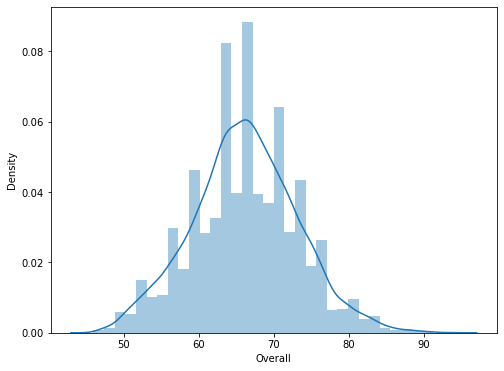

In [62]:
plt.figure(figsize = (8,6))
sns.distplot(a=df_nonull['Overall'],bins=34) # bins,k = 1+3.322log(N)
plt.show()

### 2.	Generate pair plots for the following variables:Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


Pair plot is used for numerical vs numerical variable analysis

In [63]:
df_pair = df_nonull[['Overall','Value', 'Wage','International Reputation','Height', 'Weight','Release Clause']]

In [64]:
df_pair.dtypes

Overall                       int64
Value                       float64
Wage                        float64
International Reputation    float64
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

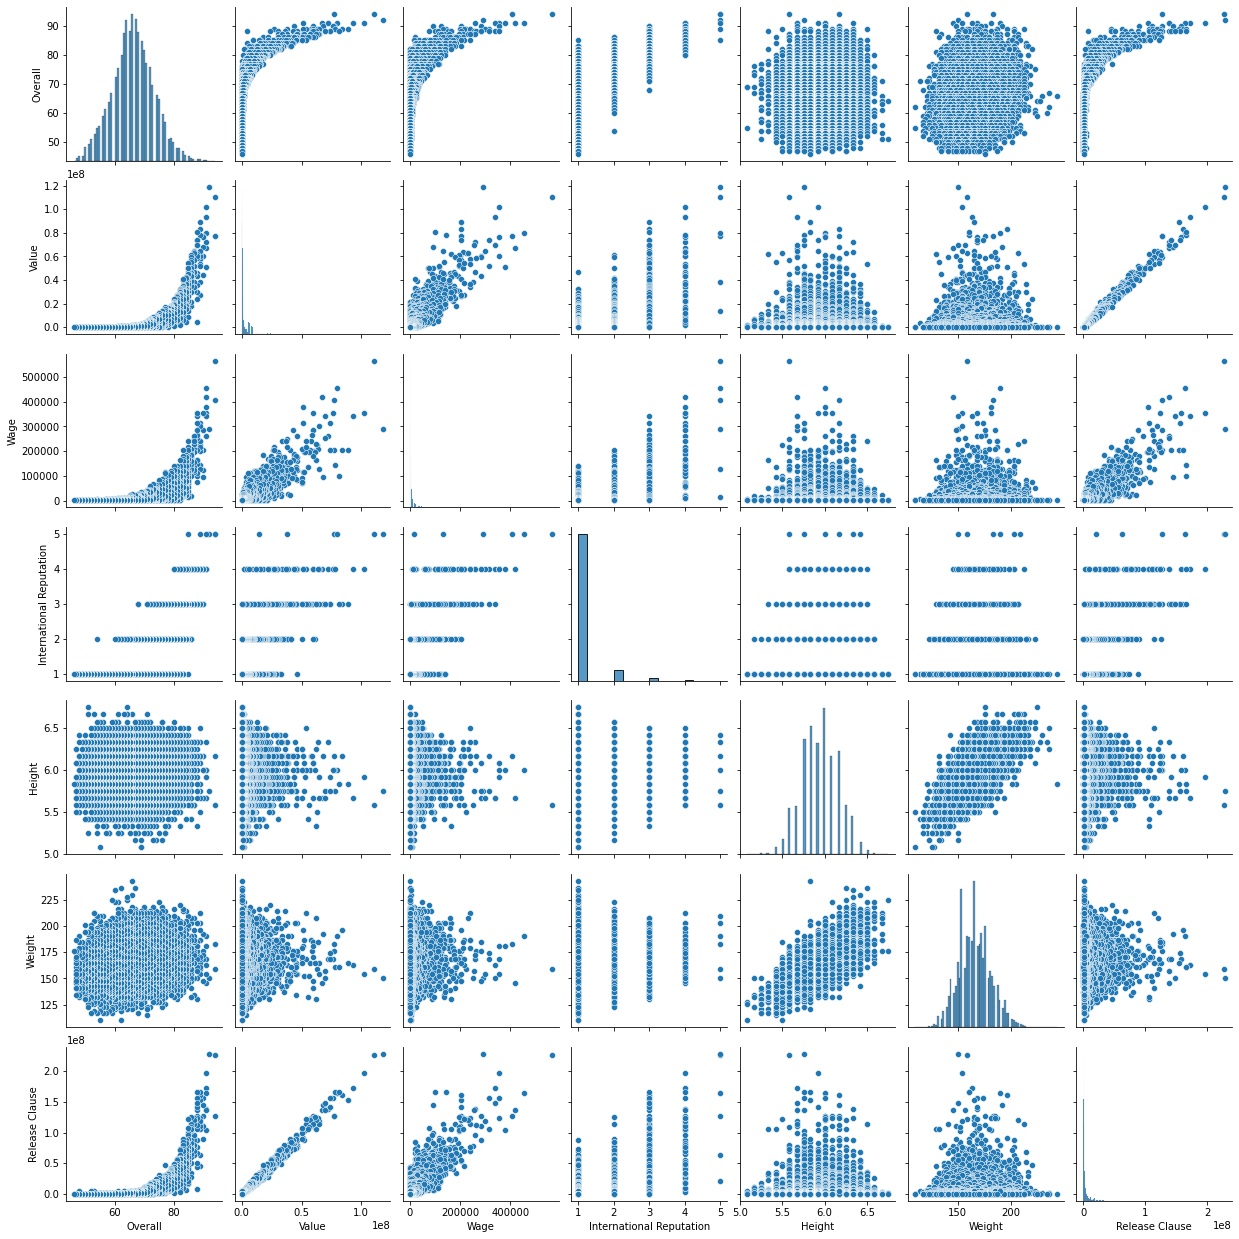

In [65]:
sns.pairplot(df_pair)
plt.show()

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [66]:
rank_des = df_nonull[df_nonull['Contract Valid Until'] == 2020].sort_values(by = 'Overall',ascending = False)

In [67]:
print('Top 20 players ranked by Overall score and whose contract expires in 2020 is')
top_20_Players = rank_des.head(20)
top_20_Players

Top 20 players ranked by Overall score and whose contract expires in 2020 is


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


#### a)	What would the average wage for this set of players be?

In [68]:
avg_wage = top_20_Players['Wage'].mean()
print('Average wage for top 20 players : ',avg_wage)

Average wage for top 20 players :  205450.0


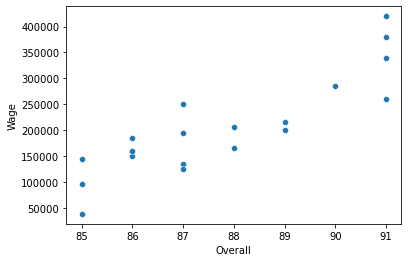

In [69]:
sns.scatterplot(x=top_20_Players['Overall'],y=top_20_Players['Wage'])
plt.show()

#### b)	What is the average age?

In [70]:
avg_age_top_20 = top_20_Players['Age'].mean()
print('Average age for top 20 players : ',avg_age_top_20)

Average age for top 20 players :  30.65


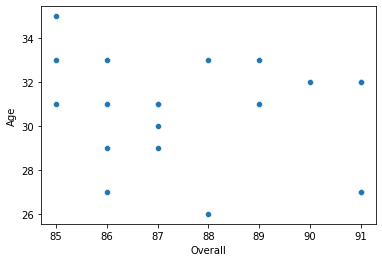

In [71]:
sns.scatterplot(x=top_20_Players['Overall'],y=top_20_Players['Age'])
plt.show()

In [72]:
avg_age_all_players = df_nonull['Age'].mean()
print('Average age of all players : ',avg_age_all_players)

Average age of all players :  25.23651975501381


#### c)	Is there a correlation between the Overall rating and Value for these players?

In [73]:
top_20_Players['Overall'].corr(top_20_Players['Value']) 
# There is a high positive correlation between Overall rating and Value for top 20 players whose contract ends in 2020

0.7867166042074152

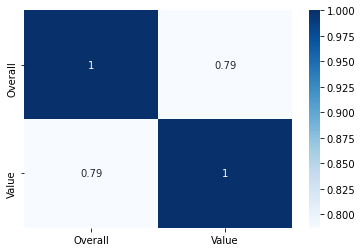

In [74]:
sns.heatmap(top_20_Players[['Overall','Value']].corr(),annot =True,cmap ='Blues')
plt.show()

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [75]:
grp_by_position = df_nonull.groupby(by= 'Position')['ID','Name','Position','Overall','Wage'].head(5)

In [76]:
top5 = grp_by_position.sort_values(by=['Position','Overall'],ascending = [True,False])
top5

,ID,Name,Position,Overall,Wage
17,194765,A. Griezmann,CAM,89,145000.0
31,190460,C. Eriksen,CAM,88,205000.0
61,201942,Roberto Firmino,CAM,86,195000.0
66,189596,T. Müller,CAM,86,135000.0
74,176635,M. Özil,CAM,86,190000.0
...,...,...,...,...,...
1,20801,Cristiano Ronaldo,ST,94,405000.0
10,188545,R. Lewandowski,ST,90,205000.0
16,202126,H. Kane,ST,89,205000.0
23,153079,S. Agüero,ST,89,300000.0


#### a)	Are there any players appearing in more than one Table. Please point out such players.

In [77]:
df_nonull['Name'].value_counts()[df_nonull['Name'].value_counts()>1]

J. Rodríguez     9
Paulinho         7
J. Valencia      6
Felipe           6
J. Williams      6
                ..
M. Baudry        2
C. Burgess       2
K. Matsubara     2
A. Henríquez     2
R. Funes Mori    2
Name: Name, Length: 670, dtype: int64

#### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [78]:
avg_wage_top5 = top5.groupby('Position')['Wage'].mean()
avg_wage_top5

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     19000.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM     94200.0
LF     121200.0
LM     164600.0
LS      92200.0
LW     261000.0
LWB     30000.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     130400.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

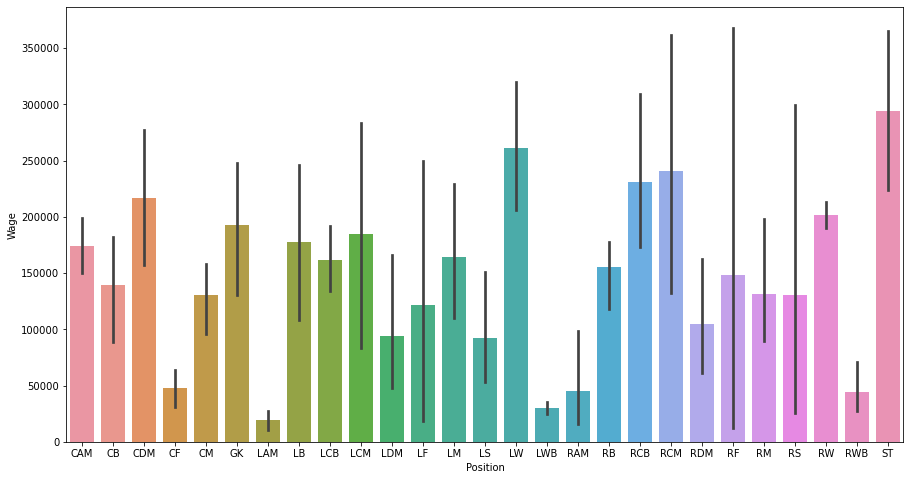

In [79]:
plt.figure(figsize = (15,8))
sns.barplot(x='Position',y = 'Wage',data =top5 )
plt.show()